<a href="https://colab.research.google.com/github/gautam-pai/PyTorch-Learning/blob/main/CIFAR10_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets,transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader

## Import Datasets

In [3]:
train_data=datasets.CIFAR10(root="./data",train=True,transform=transforms.ToTensor(),download=True)
test_data=datasets.CIFAR10(root="./data",train=False,transform=transforms.ToTensor(),download=True)

100%|██████████| 170M/170M [00:02<00:00, 62.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [22]:
class_names = train_data.classes

## Data Exploration

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'frog')

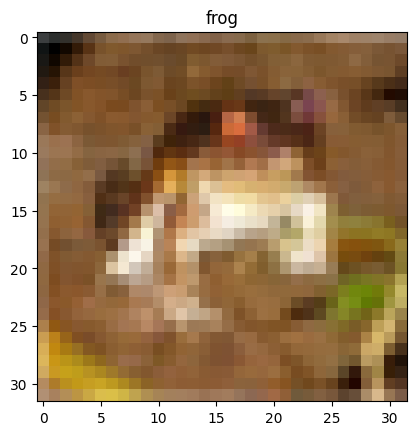

In [24]:
print(train_data[0][0].shape)
sample_image=train_data[0][0]
sample_tag=train_data[0][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'ship')

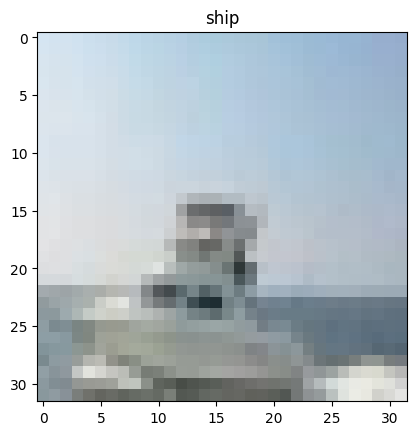

In [25]:
print(train_data[100][0].shape)
sample_image=train_data[100][0]
sample_tag=train_data[100][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'dog')

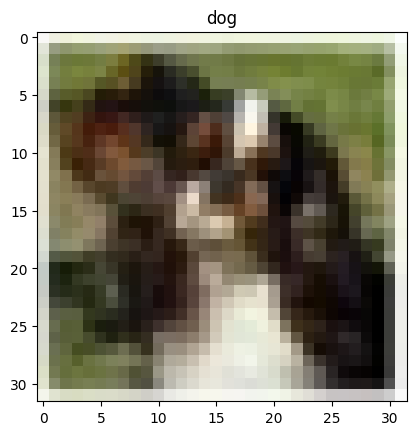

In [28]:
print(train_data[500][0].shape)
sample_image=train_data[500][0]
sample_tag=train_data[500][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'frog')

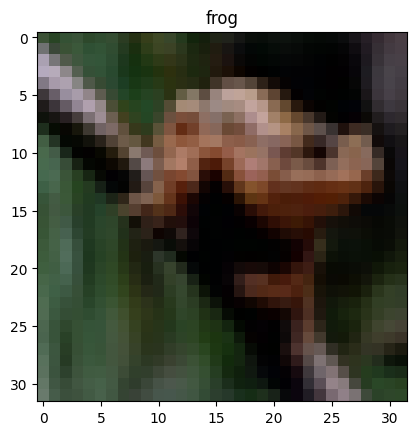

In [27]:
print(train_data[5000][0].shape)
sample_image=train_data[5000][0]
sample_tag=train_data[5000][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

## Creating batches of datasets

In [29]:
## Creating a small batch size of 10
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10, shuffle=False)

## Defining the CNN Model

In [ ]:
class Detector(nn.Module):
  def __init__(self):
    ## Conv Layers
    self.conv1=nn.Conv3d(in_channels=3,out_channels=10,kernel_size=3,stride=1)
    self.conv2=nn.Conv3d(in_channels=10,out_channels=20,kernel_size=3,stride=1)
    self.conv3=nn.Conv3d(in_channels=20,out_channels=40,kernel_size=3,stride=1)

    ## Fully Connected Layers
    self.fc1=nn.Linear(2*2*40,80)
    self.fc2=nn.Linear(80,40)
    self.fc3=nn.Linear(40,10)


  def forward(self,X):
    # ReLU activation function and Max Pooling layer
    X=F.relu(self.conv1(X))
    X=F.max_pool3d(X,kernel_size=2,stride=2)
    X=F.relu(self.conv2(X))
    X=F.max_pool3d(X,kernel_size=2,stride=2)
    X=F.relu(self.conv3(X))
    X=F.max_pool3d(X,kernel_size=2,stride=2)

    # Flattening
    X=X.view(-1,2*2*40)

    ## ANN layers
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)

    # retunrn the value using log softmax function
    return F.log_softmax(X,dim=1)

